In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Flatten,Dense
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [10]:
!kaggle datasets download -d salader/dogs-vs-cats


  0%|          | 0.00/1.06G [00:00<?, ?B/s]
  0%|          | 1.00M/1.06G [00:01<30:06, 632kB/s]
  0%|          | 2.00M/1.06G [00:02<19:45, 962kB/s]
  0%|          | 3.00M/1.06G [00:03<17:29, 1.09MB/s]
  0%|          | 4.00M/1.06G [00:03<16:25, 1.16MB/s]
  0%|          | 5.00M/1.06G [00:04<16:50, 1.13MB/s]
  1%|          | 6.00M/1.06G [00:05<15:09, 1.25MB/s]
  1%|          | 7.00M/1.06G [00:06<15:40, 1.21MB/s]
  1%|          | 8.00M/1.06G [00:07<14:49, 1.28MB/s]
  1%|          | 9.00M/1.06G [00:08<14:46, 1.28MB/s]
  1%|          | 10.0M/1.06G [00:08<14:47, 1.28MB/s]
  1%|1         | 11.0M/1.06G [00:09<14:45, 1.28MB/s]
  1%|1         | 12.0M/1.06G [00:10<14:45, 1.28MB/s]
  1%|1         | 13.0M/1.06G [00:11<14:43, 1.28MB/s]
  1%|1         | 14.0M/1.06G [00:12<15:08, 1.24MB/s]
  1%|1         | 15.0M/1.06G [00:13<14:31, 1.29MB/s]
  1%|1         | 16.0M/1.06G [00:13<14:33, 1.29MB/s]
  2%|1         | 17.0M/1.06G [00:14<14:33, 1.29MB/s]
  2%|1         | 18.0M/1.06G [00:15<14:34, 1.29MB/s]
  2

In [2]:
import zipfile

# Update the file path to match the actual download location
zip_file_path = "/path/to/.kaggle/datasets/salader/dogs-vs-cats/dogs-vs-cats.zip"

# Specify the directory where you want to extract the contents
extract_dir = "/content"

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(extract_dir)


In [3]:
path ='/content/dogs_vs_cats'
classes = os.listdir(path)
classes

['test', 'train']

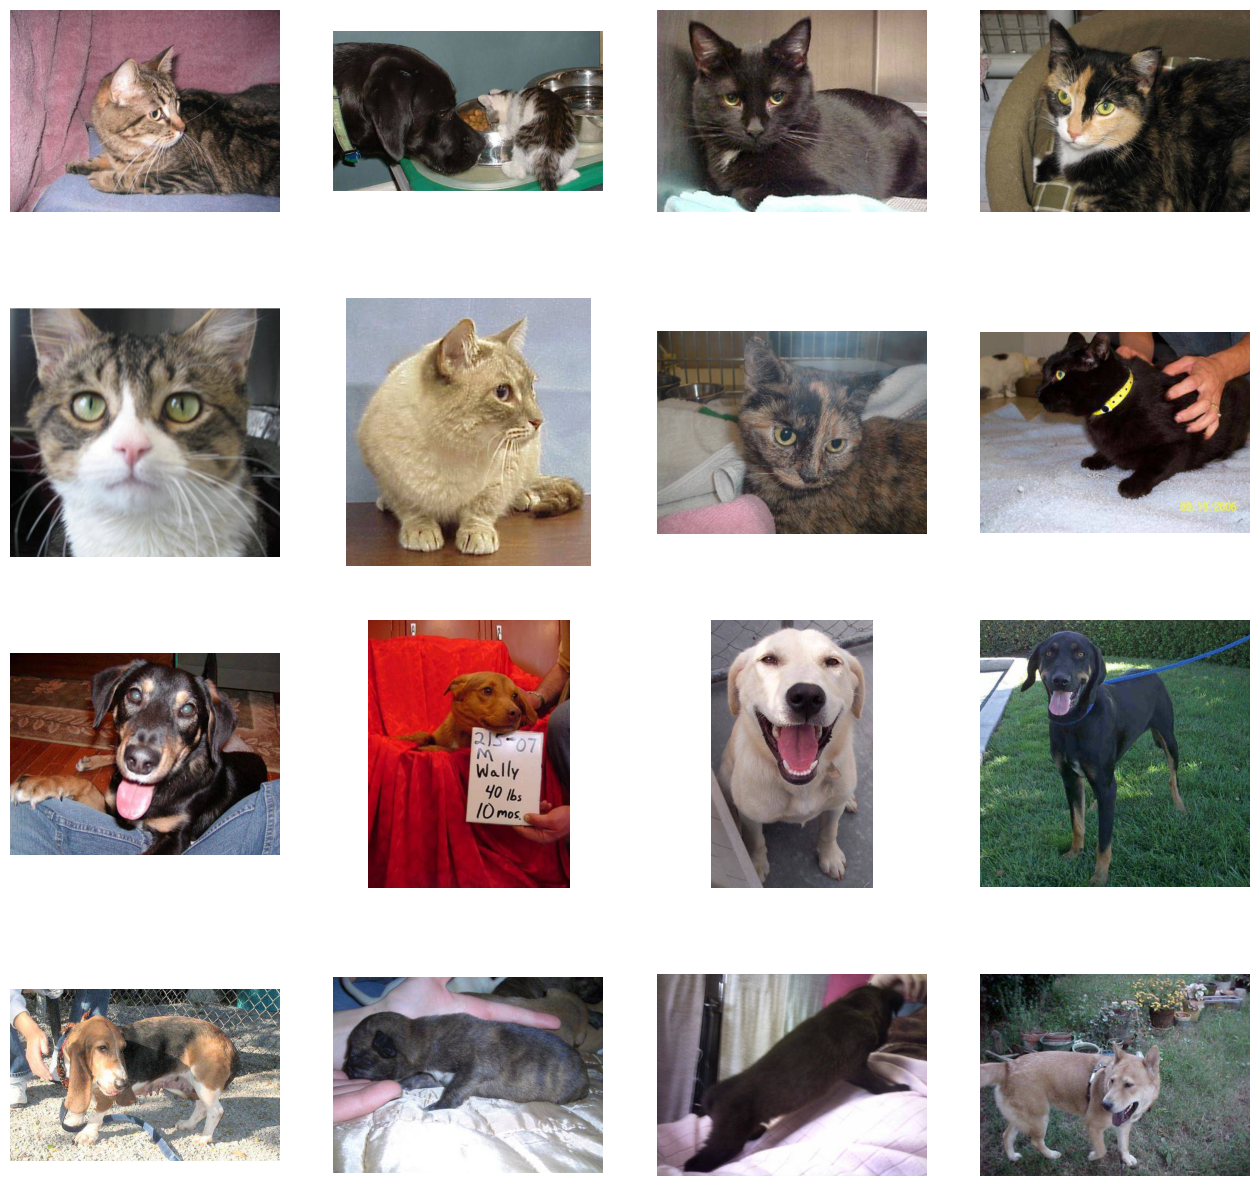

In [4]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/dogs_vs_cats/test/cats')
dog_dir = os.path.join('/content/dogs_vs_cats/test/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


In [5]:
base_dir = '/content/dogs_vs_cats'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


In [6]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

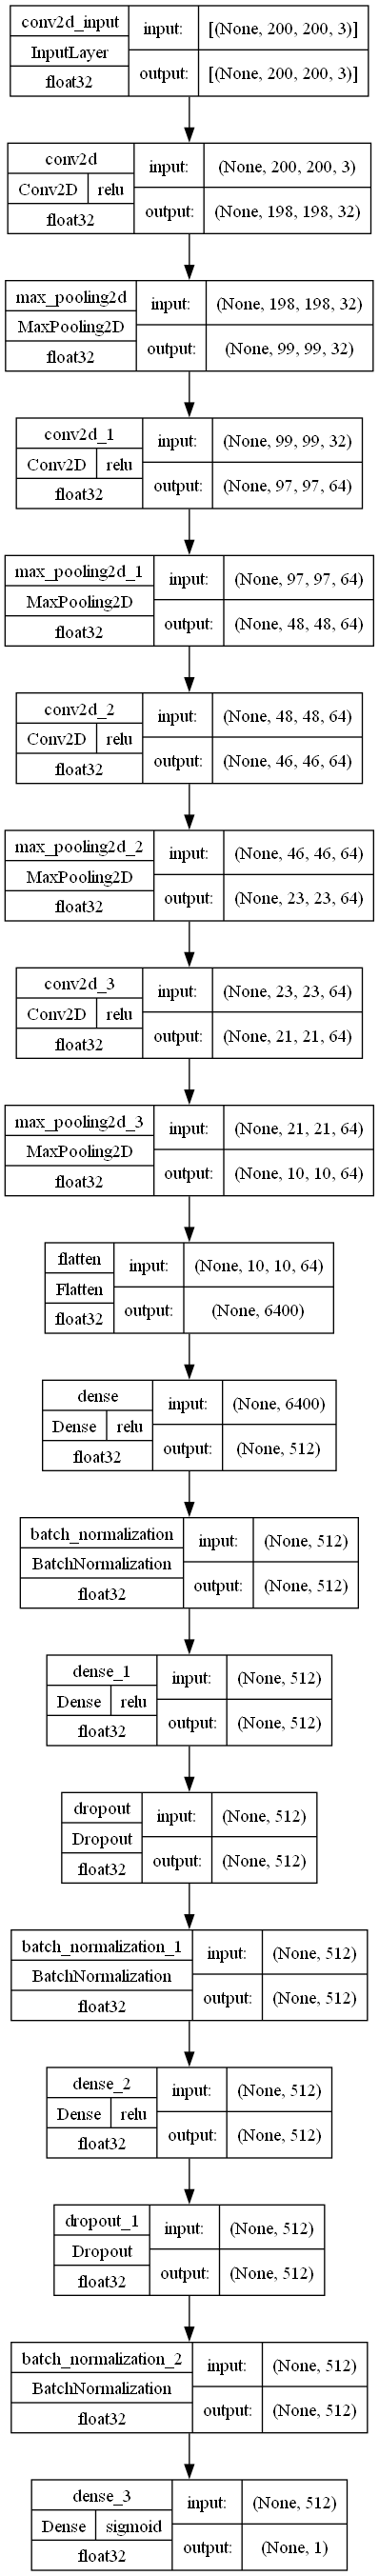

In [8]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)

In [9]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)

In [10]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)

Epoch 1/10


704/704 [==============================] - 599s 846ms/step - loss: 0.5578 - accuracy: 0.7731 - val_loss: 0.5270 - val_accuracy: 0.7924
Epoch 2/10
704/704 [==============================] - 612s 869ms/step - loss: 0.5214 - accuracy: 0.7952 - val_loss: 0.5395 - val_accuracy: 0.7924
Epoch 3/10
704/704 [==============================] - 555s 789ms/step - loss: 0.5149 - accuracy: 0.7979 - val_loss: 0.5177 - val_accuracy: 0.7924
Epoch 4/10
704/704 [==============================] - 560s 796ms/step - loss: 0.5131 - accuracy: 0.7979 - val_loss: 0.5285 - val_accuracy: 0.7924
Epoch 5/10
704/704 [==============================] - 559s 793ms/step - loss: 0.5112 - accuracy: 0.7987 - val_loss: 0.6589 - val_accuracy: 0.6240
Epoch 6/10
704/704 [==============================] - 561s 796ms/step - loss: 0.5098 - accuracy: 0.7996 - val_loss: 0.5358 - val_accuracy: 0.7912
Epoch 7/10
704/704 [==============================] - 555s 787ms/step - loss: 0.5076 - accuracy: 0.8000 - val_loss: 0.5264

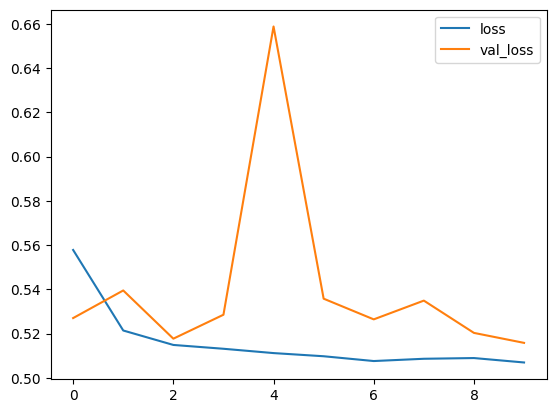

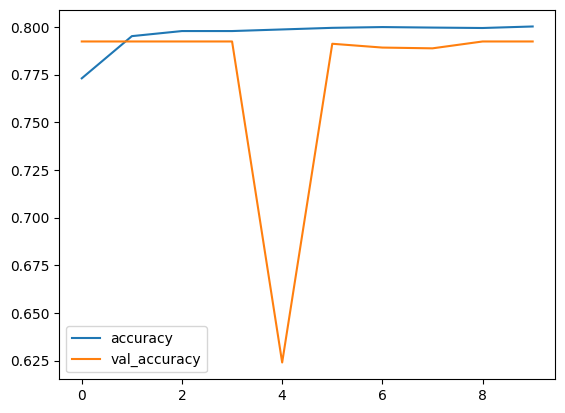

In [11]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 377ms/step
Cat


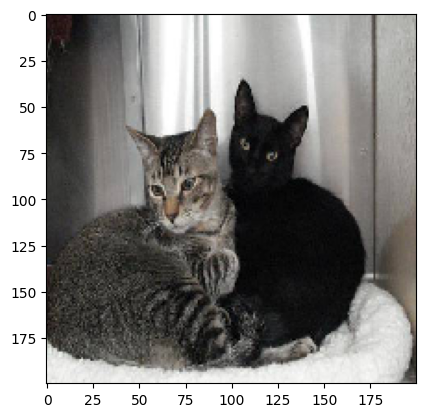

In [12]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('cat.8.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=1):
   print("Dog")
else:
   print("Cat")

1/1 [==============================] - 0s 39ms/step
Dog


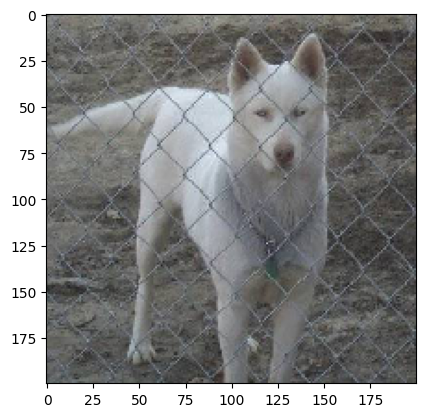

In [13]:
test_image = image.load_img('dog.1165.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")
